Aplikasi dari klasifikasi multi kelas sangat banyak, lebih banyak dari klasifikasi biner. Contohnya seperti produk-produk pada toko online dan program pengenalan wajah. Tentu terdapat lebih dari 2 jenis wajah manusia di bumi ini bukan?

Nah langsung saja kita mulai latihan kita. Pada kelas sebelumnya kita telah belajar mengklasifikasi dataset iris menggunakan decision tree. Di submodul ini kita akan belajar menggunakan jst untuk mengklasifikasikan spesies bunga iris.

Pertama impor library yang dibutuhkan untuk latihan kita.

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Kemudian kita gunakan fungsi read_csv() untuk mengubah dataset menjadi pandas dataframe. Untuk menampilkan dataframe kita hanya perlu menulis nama dari dataframe kita.

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Dapat kita lihat bahwa terdapat kolom id yang tidak ada hubungan dengan label sehingga kita perlu membuang kolom tersebut. Untuk membuang kolom dari dataframe gunakan fungsi drop().

In [4]:
df = df.drop(columns='Id')

Selanjutnya kita perlu melakukan one hot encoding karena label kita merupakan data kategorikal. Fungsi get_dummies() memudahkan kita untuk melakukan hal ini.

In [6]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai.

In [8]:
new_df = pd.concat([df, category], axis = 1)
new_df = new_df.drop(columns = 'Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Selanjutnya setelah dataframe kita olah, kita konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

In [9]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

Nah, tahap berikutnya adalah kita memisahkan antara atribut dan label dengan menjalankan kolom di bawah.

In [10]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:, 0:4]
# Pilih 3 kolom terakhir sebagai label
Y = dataset[:, 4:7]

Lalu, kita perlu lakukan normalisasi data agar data dapat dipelajari dengan baik oleh jst kita.

In [12]:
# Normalize
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Lakukan pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%. Anda dapat bereksperimen menggunakan nilai lainnya.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

Untuk arsitektur model kita kali ini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini. 

In [18]:
model = Sequential([
                   Dense(64, activation='relu', input_shape=(4,)),
                   Dense(64, activation='relu'),
                   Dense(3, activation='softmax')
])

Lanjutkan dengan menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, Anda dapat menggunakan loss ‘categorical_crossentropy’.

In [19]:
model.compile(
              optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

Nah, pada latihan ini ada sedikit perubahan. Fungsi fit() sekarang kita tampung ke dalam objek hist(history). Untuk apa kita melakukan hal ini? Temukan jawabannya di submodul berikutnya ya.

In [20]:
hist = model.fit(
                X_train, Y_train, epochs=100
)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0755 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0446 - accuracy: 0.3714
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0159 - accuracy: 0.5524
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9892 - accuracy: 0.6286
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9620 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9365 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9083 - accuracy: 0.6667
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8795 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8479 - accuracy: 0.6667
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

Terakhir kita bisa menguji akurasi prediksi model pada data uji.

In [22]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0513 - accuracy: 0.9778


[0.05125260353088379, 0.9777777791023254]

Di latihan tadi kita pasti penasaran kenapa menampung fungsi fit pada sebuah objek history. Jawabannya adalah karena kita dapat membuat plot dari akurasi dan loss model kita pada saat proses pelatihan. 

Plot ini sangat berguna untuk melihat proses keseluruhan pembelajaran model seiring waktu. Untuk melihat bagaimana plot bekerja kita kerjakan latihan berikut. Kita akan menggunakan dataset dan model yang sama dengan latihan tadi. Anda dapat menggunakan latihan tadi dan menambahkan kode-kode berikut di bawah latihan sebelumnya.

In [24]:
import matplotlib.pyplot as plt

Kemudian dengan objek pyplot kita akan melakukan plot dari objek history. Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model. Kode di bawah menunjukkan bagaimana kita bisa membuat plot loss dari model. Untuk mengakses loss kita bisa memanggil fungsi history pada objek history dan memilih metrik loss. Dari hasil plot loss di bawah Anda dapat melihat bahwa loss model berkurang sangat signifikan dari epoch pertama sampai epoch ke-100.

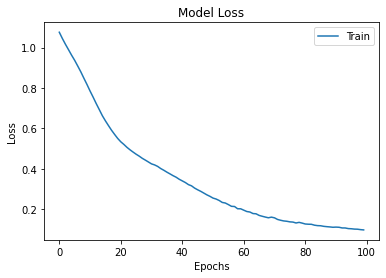

In [25]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

Untuk membuat plot dari akurasi kita bisa memilih metrik accuracy pada fungsi history. Dari hasil plot di bawah, cek bahwa akurasi model stagnan pada epoch di sekitar 20 dan juga kembali stagnan pada epoch di atas 80.

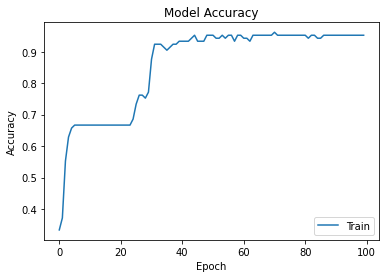

In [27]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='lower right')
plt.show()

Selamat, Anda telah memahami bagaimana membuat plot akurasi dan loss dari model Anda. Pada modul-modul selanjutnya kita akan membahas lebih dalam bagaimana menggunakan plot ini untuk mendeteksi overfitting dan underfitting. 



